# 모델 저장 및 읽어오기

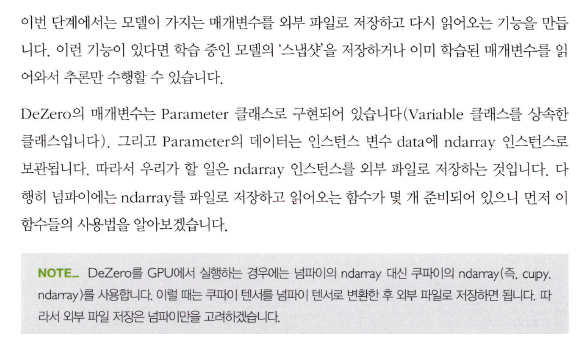

## numpy의 save와 load

In [4]:
import numpy as np

x = np.array([1, 2, 3])
np.save('test.npy', x)

x = np.load('test.npy')
print(x)

[1 2 3]


In [6]:
# npz는 여러개의 ndarray
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])

# 딕셔너리 형태로 저장
np.savez('test.npz', x1=x1, x2=x2)

arrays = np.load('test.npz')
x1 = arrays['x1']
x2 = arrays['x2']
print(x1)
print(x2)

[1 2 3]
[4 5 6]


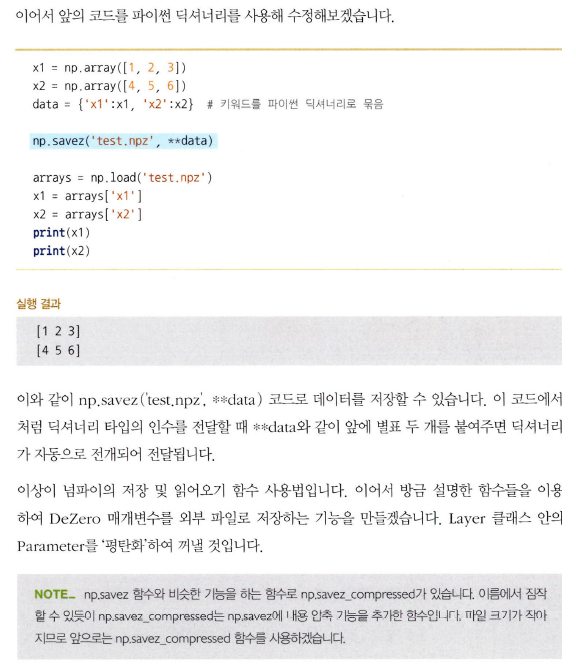

# 클래스의 매개변수를 평평하게
이유는 npz저장할 때 차원을 1차원으로 펼쳐서 저장하기 때문이다. **"평탄화"**

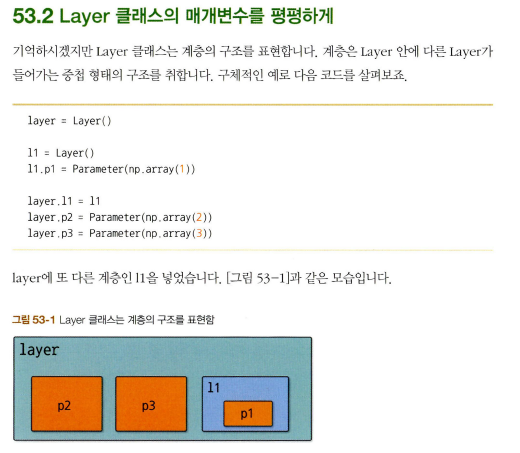

In [7]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
np.random.seed(0)
from dezero import Variable, as_variable
import dezero.functions as F
from dezero.layers import Layer
from dezero.core import Parameter

In [8]:
layer = Layer()

l1 = Layer()
l1.p1 = Parameter(np.array(1))

layer.l1 = l1
layer.p2 = Parameter(np.array(2))
layer.p3 = Parameter(np.array(3))

In [12]:
params_dict = {}
layer._flatten_params(params_dict)
print(params_dict)

{'p2': variable(2), 'p3': variable(3), 'l1/p1': variable(1)}


# MNIST

In [2]:
import os, sys
if '__file__' in globals():
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP

In [ ]:
max_epoch = 3
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

# 추가
if os.path.exists('my_mlp.npz'):
    model.load_weights('my_mlp.npz')
    
for epoch in range(max_epoch):
    sum_loss = 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)

    print('epoch: {}, loss: {:.4f}'.format(
        epoch + 1, sum_loss / len(train_set)))

model.save_weights('my_mlp.npz')